<img src="../.images/logosnb.png" alt="Banner" style="width:800px;"/>

<div style='color: #690027;' markdown="1">
    <h1>ReLU</h1> 
</div>

<div class="alert alert-box alert-success">
Om een neuraal netwerk op te bouwen, heeft men een <b>activatiefunctie</b> nodig. ReLu is een veelgebruikte activiatiefunctie. 
</div>

In het volgende voorbeeld beschouwt men blauwe en groene punten in het vlak. Van elk punt is de coördinaat en de kleur gegeven.

### De nodige modules importeren

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

<div style='color: #690027;' markdown="1">
    <h2>1. Inlezen van de data</h2> 
</div>

Lees met de module `pandas` de dataset in.

In [2]:
punten = pd.read_csv("../.data/IntroductieDeepLearning/data.dat", header=None)  # in te lezen tabel heeft een hoofding

<div style='color: #690027;' markdown="1">
    <h2>2. Tonen van de ingelezen data</h2> 
</div>

Bekijk de data door de instructie `punten` uit te voeren. De dataset bestaat uit de x- en y-coördinaat van de punten en de kleur van elk punt. <br>
De x- en y-coördinaat zijn kenmerken, de kleur is een label. <br> Omdat er twee soorten labels zijn, zegt men dat de punten verdeeld zijn over twee klassen.

In [3]:
punten

,0,1,2
0,0.74,8.55,blauw
1,-0.61,8.37,blauw
2,-1.82,11.30,blauw
3,-1.48,10.20,blauw
4,2.00,12.00,blauw
5,1.35,9.83,blauw
6,-3.48,11.09,groen
7,-3.21,9.29,groen
8,-2.90,7.41,groen
9,-2.29,4.23,groen


Deze tabel is een tabel met 15 rijen en 3 kolommen: er zijn immers 15 punten, 2 kenmerken (x1, x2) en 1 label (y). <br><br>
De kenmerken:
- eerste kolom: x-coördinaat; 
- tweede kolom: y-coördinaat.

Het label:
- derde kolom: kleur.

<div style='color: #690027;' markdown="1">
    <h2>3. Onderzoeken of de punten van elkaar kunnen gescheiden worden</h2> 
</div>

<div style='color: #690027;' markdown="1">
    <h3>3.1 Visualiseren van de data</h3> 
</div>

Om de data te visulaliseren, heb je de x- en y-coördinaat van de punten nodig.

In [4]:
# coördinaten van de punten
X = punten.iloc[:, [0, 1]].values 
X.shape        
print(X)

[[ 0.74  8.55]
 [-0.61  8.37]
 [-1.82 11.3 ]
 [-1.48 10.2 ]
 [ 2.   12.  ]
 [ 1.35  9.83]
 [-3.48 11.09]
 [-3.21  9.29]
 [-2.9   7.41]
 [-2.29  4.23]
 [-1.35  0.81]
 [ 0.22 -0.95]
 [ 2.1   3.43]
 [ 2.39  4.69]
 [ 3.39 10.5 ]]


In [ ]:
print(X[:, 0])    # eerste kolom van X: x-coördinaat
print(X[:, 1])    # tweede kolom van X: y-coördinaat

<div style='color: #690027;' markdown="1">
    <h3>3.2 De data weergeven in puntenwolk</h3> 
</div>

In [5]:
x1 = X[:, 0]                # kenmerk: x-coördinaat
x2 = X[:, 1]                # kenmerk: y-coördinaat
# print(type(x1))
# print(x1.min(), x1.max())
# print(x2.min(), x2.max())

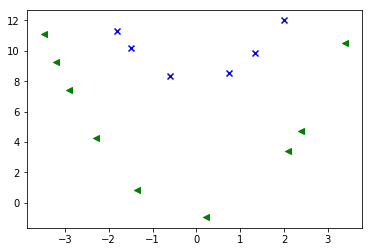

In [6]:
plt.figure()     

plt.scatter(x1[:6], x2[:6], color="blue", marker="x")    
plt.scatter(x1[6:], x2[6:], color="green", marker="<") 

plt.show()

Het is duidelijk dat deze punten **niet lineair scheidbaar** zijn. Het is onmogelijk één rechte te vinden, die de groene punten scheidt van de blauwe.<br>
Met een kromme zou het wel gaan. 

<div style='color: #690027;' markdown="1">
    <h2>4. Classificatie</h2> 
</div>

<div style='color: #690027;' markdown="1">
    <h3>4.1 Een scheiding</h3> 
</div>

Zoals uit het volgende script blijkt, kunnen er wel twee rechten gevonden worden, die gebruikt kunnen worden om een scheiding te realiseren.

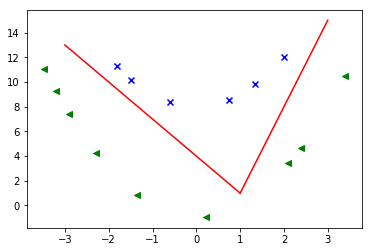

In [7]:
# scheiding ('decision boundary')
# scheidingslijnen worden bepaald door punten op betreffende rechten
x_1 = np.linspace(-3, 1, 10)   # lijnstuk op domein [-3, 1]
x_2 = np.linspace(1, 3, 10)    # lijnstuk op domein [1, 3]
y_r_1 = 7 * x_2 - 6
y_r_2 = -3 * x_1 + 4

plt.figure()    

# data
plt.scatter(x1[:6], x2[:6], color="blue", marker="x")    
plt.scatter(x1[6:], x2[6:], color="green", marker="<") 
# scheidingslijnen
plt.plot(x_2, y_r_1, color="red")
plt.plot(x_1, y_r_2, color="red")

plt.show()

<div style='color: #690027;' markdown="1">
    <h3>4.2 Twee gebieden</h3> 
</div>

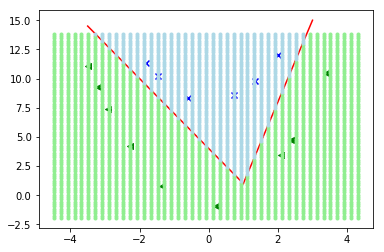

In [8]:
x_1 = np.linspace(-3.5, 1, 10)
x_2 = np.linspace(1, 3, 10)
y_r_1 = 7 * x_2 - 6
y_r_2 = -3 * x_1 + 4
# gekleurde gebieden, resolution = 0.2
xx1 = np.arange(x1.min()-1, x1.max()+1, 0.2)
xx2 = np.arange(x2.min()-1, x2.max()+2, 0.2) 

plt.figure()  

# data 
plt.scatter(x1[:6], x2[:6], color="blue", marker="x")    
plt.scatter(x1[6:], x2[6:], color="green", marker="<") 
# scheidingslijnen
plt.plot(x_2, y_r_1, color="red")
plt.plot(x_1, y_r_2, color="red")
# gekleurde gebieden, resolution = 0.2                  
for a in xx1:
    for b in xx2:
        if (7 * a - b - 6 <= 0) and (-3 * a - b + 4 <= 0):
            kleur = "lightblue"
        else:
            kleur = "lightgreen"
        plt.plot(a, b, marker='.', color=kleur)
        
plt.show()

<div style='color: #690027;' markdown="1">
    <h3>4.3 ReLU</h3> 
</div>

Hieronder wordt de code aangepast, zodat gebruik wordt gemaakt van de ReLu-functie. Zo wordt het duidelijk dat met ReLu een gebied kan worden opgedeeld in verschillende gebieden.<br>

De functie die bepaalt tot welke klasse een punt behoort, heet $\phi$.

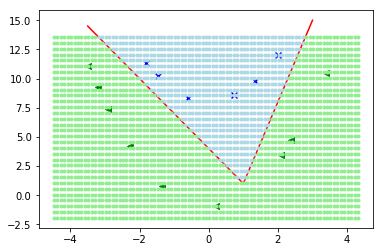

In [9]:
def relu(x):
    """ReLU(x) = max(x,0). """
    return np.maximum(x,0)

def phi(x, y):
    """Activatiefunctie."""
    som = relu(7 * x - y - 6) + relu(-3 * x - y + 4)
    return som


x_1 = np.linspace(-3.5, 1, 10)
x_2 = np.linspace(1, 3, 10)
y_r_1 = 7 * x_2 - 6
y_r_2 = -3 * x_1 + 4
xx1 = np.arange(x1.min()-1, x1.max()+1, 0.1)
xx2 = np.arange(x2.min()-1, x2.max()+2, 0.5) 

plt.figure()

# data en scheidingslijnen
plt.scatter(x1[:6], x2[:6], color="blue", marker="x")    
plt.scatter(x1[6:], x2[6:], color="green", marker="<") 
plt.plot(x_2, y_r_1, color="red")
plt.plot(x_1, y_r_2, color="red")
# gekleurde gebieden
for a in xx1:
    for b in xx2:
        if phi(a, b) == 0:
            kleur = "lightblue"
        else:
            kleur = "lightgreen"
        plt.plot(a, b, marker='.', color=kleur)
        
plt.show()

<div style='color: #690027;' markdown="1">
    <h2>5. Classificatie met ML</h2> 
</div>

<div style='color: #690027;' markdown="1">
    <h3>5.1 Geannoteerde data</h3> 
</div>

Kan het AI-systeem een soortgelijke scheiding vinden? <br>
Het AI-systeem zal machinaal leren uit de **gelabelde** punten.<br> 
Lees de labels in.

In [10]:
y = punten.iloc[:, 2].values         # labels: laatste kolom van de oorspronkelijke tabel
y = np.where(y == "blauw", 1, 0)     # labels numeriek maken, blauw:1, groen:0

<div style='color: #690027;' markdown="1">
    <h3>5.2 Met 2 layers</h3> 
</div>

Als twee klassen lineair scheidbaar zijn, kan men een rechte vinden die beide klassen scheidt. Man kan de vergelijking van de scheidingslijn zodanig opschrijven (in de vorm ax+by+c=0) dat voor elk punt (x1, y1) in de ene klasse ax1+by1+c >= 0 en voor elk punt (x1, y1) in de andere klasse ax1 +by1=c < 0. <br> 
Zolang dit niet voldaan is, moeten de coëfficiënten worden aangepast.<br>
De trainingset met bijhorende labels wordt enkele keren doorlopen. Voor elk punt worden de coëfficiënten aangepast indien nodig.

In [13]:
def grafiek(cte, coeff_x1, coeff_x2):
        """Plot scheidingsrechte ('decision boundary') en geeft vergelijking ervan."""
        
def relu(tensor):
    """Relu(x) = max(0,x)."""
    return np.maximum(0,tensor)

class Neuraalnetwerk:
    """Neuraal netwerk met drie lagen, twee neuronen per laag.""" 
    
    def __init__(self, learningrate, inputnodes, hiddennodes, outputnodes):
        """self heeft drie parameters: leersnelheid, aantal inputneuronen, aantal outputneuronen."""
        self.eta = learningrate
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.wih = (np.random.rand(self.hnodes, self.inodes) - 0.5)
        self.who = (np.random.rand(self.onodes, self.hnodes) - 0.5)
        self.activation_function = relu
        # self.activation_function = lambda x: scipy.special.expit(x)

    def train(self, X, y):
        """Fit training data."""
        inputs = np.array(X, ndmin=2).T
        targets = np.array(y).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        self.who += self.eta *np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        self.wih += self.eta *np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
    def query(self, inputs_list):
        """converteert inputs tot 2D array, berekent signalen"""
        inputs = np.array(inputs_list, ndim=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)  
        return final_outputs

Maak een object van de klasse `Neuraalnetwerk`.

In [14]:
# neuraal netwerk, leersnelheid = 0.3, telkens twee input-, output- en hidden neuronen
nn = Neuraalnetwerk(0.3, 2, 2, 2)

In [15]:
nn.train(X, y)

Gelukt!